In [1]:
#1. Import dataset
import pandas as pd
train_set_clean_transform= pd.read_csv("train_set_clean_transform.csv")
test_set_clean_transform= pd.read_csv("test_set_clean_transform.csv")

In [2]:
# 4. Check data types of variables
print("\nData types of each column(Train):")
print(train_set_clean_transform.dtypes)
print("\nData types of each column(Test):")
print(test_set_clean_transform.dtypes)


Data types of each column(Train):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object

Data types of each column(Test):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object


In [3]:
#6. Identify object type columns
object_cols = train_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
train_set_clean_transform[object_cols] = train_set_clean_transform[object_cols].astype('category')
# Verify the conversion
#print("Data types after conversion:")
#print(train_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
#print("\nMemory usage before conversion:", train_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(train_set_clean_transform.dtypes)


#6. Identify object type columns
object_cols = test_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
test_set_clean_transform[object_cols] = test_set_clean_transform[object_cols].astype('category')
# Verify the conversion
#print("Data types after conversion:")
#print(test_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
#print("\nMemory usage before conversion:", test_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(test_set_clean_transform.dtypes)


Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object
Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


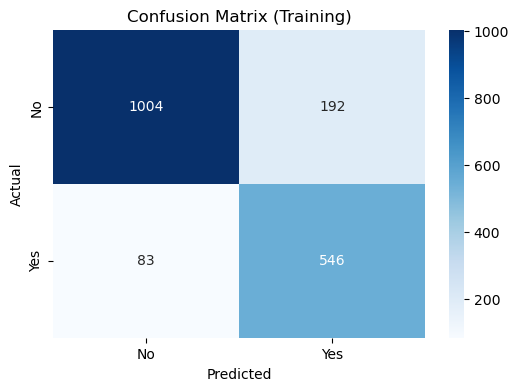

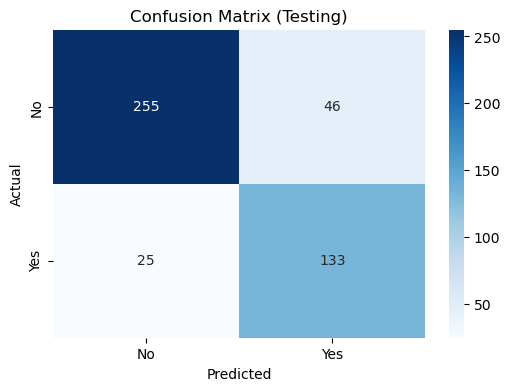


Training Metrics:
                         Value
Accuracy              0.849315
Sensitivity (Recall)  0.868045
Specificity           0.839465
F1 Score              0.798830
AUC-ROC               0.931627

Testing Metrics:
                         Value
Accuracy              0.845316
Sensitivity (Recall)  0.841772
Specificity           0.847176
F1 Score              0.789318
AUC-ROC               0.919151


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# 1. DATA PREPARATION
# =============================================

# Separate features and target (assuming seqn is index)
X_train = train_set_clean_transform.drop(['MetabolicSyndrome','seqn','QT_BMI','Income'], axis=1)
y_train = train_set_clean_transform['MetabolicSyndrome'].cat.codes  # Convert to 0/1

X_test = test_set_clean_transform.drop(['MetabolicSyndrome','seqn','QT_BMI','Income'], axis=1)
y_test = test_set_clean_transform['MetabolicSyndrome'].cat.codes

# =============================================
# 2. PREPROCESSING SETUP (STANDARDIZE ALL NUMERICAL VARIABLES)
# =============================================

# Identify column types
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create transformers - NOW STANDARDIZING ALL NUMERICAL VARIABLES
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardizing ALL numerical variables
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# Simplified ColumnTransformer - no special handling for QT_* variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),  # All numericals standardized
        ('cat', categorical_transformer, categorical_cols)
    ])

# =============================================
# 3. MODEL PIPELINE (UNCHANGED)
# =============================================

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        max_iter=1000,
        random_state=42,
        class_weight='balanced'  # Handles class imbalance
    ))
])

# Train model
model.fit(X_train, y_train)

# =============================================
# 4. EVALUATION METRICS (UNCHANGED)
# =============================================

def evaluate_model(X, y, dataset_name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    sensitivity = recall_score(y, y_pred)  # Recall = Sensitivity
    specificity = recall_score(y, y_pred, pos_label=0)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1,
        'AUC-ROC': auc
    }

# Evaluate on both sets
train_metrics = evaluate_model(X_train, y_train, 'Training')
test_metrics = evaluate_model(X_test, y_test, 'Testing')

# Display results
print("\nTraining Metrics:")
print(pd.DataFrame.from_dict(train_metrics, orient='index', columns=['Value']))

print("\nTesting Metrics:")
print(pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Value']))